# Naive Bayes classifier

## Introduction

Naive Bayes models are one of the simplest class of models for classifying tasks. It relies on heavy independence assumptions of the features, assumptions which in most cases turn out to be false, but the classifiers still perform surprisingly well, as we will see with some examples.

## Model

Suppose we have a dataset consisting of pairs (features,class), $\{ (x^1,y^1),\dots, (x^m,y^m)\}\subset \mathbb{R}^m\times F$ where $F$ is a finite set. We can identify $F$ with the set $\{0,\dots,K \}$ for some positive integer number $K$. We will follow the same Bayesian approach that we folloed in previous notebooks: for each class $j$ we have a prior probability $\pi_j$, and denote by $p_j(x \mid y = j)$ the conditional distribution of $x=(x_1,\dots,x_n)$ for each class. The main assumption of the model is that each function $p_j$ can be factored as a product of single variable functions:
$$
p_j(x_1,\dots,x_n \mid y = j) = \prod_{i=1}^n p_{ji}(x_i \mid y =j)
$$
where each function $f_{ji}$ representes the conditional distribution of the $i-th$ variable given the class $j$. Thus, the Bayes theorem yields
\begin{align*}
p(y = j \mid x) &= \dfrac{ p(x \mid y = j)\pi_j}{\sum_{i=1}^n p(x \mid y = i) \pi_i} \\
&= \dfrac{\left(\prod_{i=1}^n p_{ji}(x_i \mid y =j)\right)\pi_j}{\sum_{i=1}^n p(x \mid y = i)\pi_i} \\
&\propto \pi_j\prod_{i=1}^n p_{ji}(x_i \mid y =j)
\end{align*}
since the denominator is the same for all classes. 

## Gaussian distribution

For the rest of the notebook, we will assume that each variable has a Gaussian conditional distribution, that is
$$
p_{ji}(x_i \mid y =j) = \dfrac{1}{\sqrt{2\pi \sigma_{ji}^2}}\exp( -\dfrac{(x_i - \mu_{ji})^2}{2\sigma_{ji}^2} ),
$$
where $\mu_{j} = (\mu_{ji})_{i=1}^n$ is the vector of means of each variable conditional to the class $j$ and $\sigma_{j} = (\sigma_{ji})_{i=1}^n$ is the vector of variances of each variable conditional to the class $j$. Note that this would correspond to the diagonal od the covariance matrix of $(x_1,\dots,x_n)$ conditional to the class $j$ in the multivariate Gaussian distribution case (see LDA and QDA).

## Maximum likelihood estimators

In previous notebooks we have used maximum likelihood estimates for the parameters of the distributions being modelled. In this section we are going to prove that these estimators indeed maximize the likelihood.
The main idea is that we find the parameters $\hat\mu,\hat\sigma$ of the distribution that maximize the probability of having observed that data (technically, since the distribution is continuous, they maximize the density). That is
$$
\hat\mu,\hat\sigma = \underset{\mu,\sigma}{\mathrm{argmax \ }} p(x \mid \mu , \sigma).
$$
We will analyze each class and each variable separately, as the idea is the same for all of them. Suppose the first $s$ points of the dataset belong to the class $j$. The likelihood of having observed the data $\{(x^1_k,j),\dots,(x^s_k,j)\}$ is given by
$$
\prod_{i=1}^s p(x^i_k\mid \mu ,\sigma) = \prod_{i=1}^s \dfrac{1}{\sqrt{2\pi \sigma_{jk}^2}}\exp( -\dfrac{(x_k^i - \mu_{jk})^2}{2\sigma_{jk}^2} ).
$$
Note that since the logarithm is an increasing function, finding the argmax of the likelihood is equivalent to finding the argmax of the logarithm of it.
$$
\log \prod_{i=1}^s p(x^i_k\mid \mu ,\sigma) = s\log\dfrac{1}{\sqrt{2\pi \sigma_{jk}^2}} - \sum_{i=1}^ s \dfrac{(x_k^i - \mu_{jk})^2}{2\sigma_{jk}^2}.
$$
To find the maximum, we compute the gradient $\nabla_{\mu_{jk},\sigma_{jk}}$ and set it equal to zero:
\begin{align*}
\dfrac{\partial}{\partial \mu_{jk}} \log \prod_{i=1}^s p(x^k_k\mid \mu ,\sigma)   &= - \sum_{i=1}^ s \dfrac{(x_k^i - \mu_{j1})}{\sigma_{jk}^2}  \\
\dfrac{\partial}{\partial \sigma_{jk}} \log \prod_{i=1}^s p(x^k_k\mid \mu ,\sigma) &= -\dfrac{s}{\sigma_{jk}} +  \sum_{i=1}^ s \dfrac{(x_k^i - \mu_{jk})^2}{\sigma_{jk}^3}
\end{align*}
which implies that
\begin{align*}
\hat\mu_{jk} &= \dfrac{1}{s}  \sum_{i=1}^ s x_k^i \\
\hat\sigma_{jk}^2& = \dfrac{1}{s} \sum_{i=1}^ s (x_k^i - \hat\mu_{jk})^2. \\
\end{align*}
It is worth pointing out that this estimator for $\sigma^2$ is biased, so a correction can be performed to obtain an unbiased estimator:
$$
\hat\sigma_{jk}^2 = \dfrac{1}{s-1} \sum_{i=1}^ s (x_k^i - \hat\mu_{jk})^2.
$$
In our context this will not be very relevant. It is also possible to compute further statistical properties of these estimators, but as we will not use them here, we postpone such computations for future notebooks.

## Implementing the algorithm

We proceed now to implement the naive Bayes classifier with randomly generated data. We start by importing the usual libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We generate three clouds of data given by Gaussian multivariate distributions. Note that the covariance matrices are **not** diagonal:

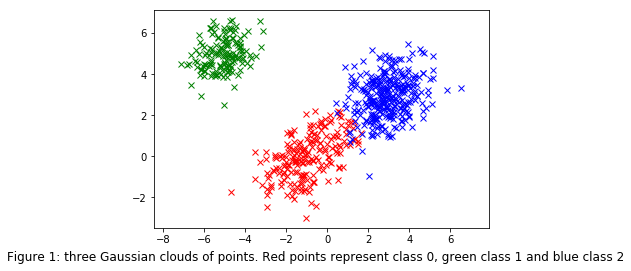

In [2]:
x0 = np.random.multivariate_normal([-1, 0], [[1.35, 0.75],[0.75, 1.35]], 200)
x1 = np.random.multivariate_normal([-5, 5], [[0.6, .25],[.25, 0.6]], 150)
x2 = np.random.multivariate_normal([3, 3], [[1, .35],[.35, 1]], 300)

plt.plot(x0[:,0],x0[:,1],'x',color='red')
plt.plot(x1[:,0],x1[:,1],'x',color='green')
plt.plot(x2[:,0],x2[:,1],'x',color='blue')
plt.figtext(0.5, 0.01, 'Figure 1: three Gaussian clouds of points. Red points represent class 0, green class 1 and blue class 2', 
            wrap=True, horizontalalignment='center', fontsize=12)
plt.axis('equal')
plt.show()

y0 = np.zeros(len(x0))
y1 = np.ones(len(x1))
y2 = 2*np.ones(len(x2))

X_train =  np.vstack((x0,x1,x2))
Y_train = np.append(np.append(y0,y1),y2)

We build the functions that estimate the parameters of the model:

In [3]:
def priors(X_train,Y_train):
    P = []
    for i in np.unique(Y_train):
        P.append((np.sum(Y_train == i))/(len(Y_train)))
    return P

def means(X_train,Y_train):
    M = []
    for i in np.unique(Y_train):
        M.append(np.mean(X_train[Y_train == i],axis=0))
    return M

def variances(X_train,Y_train):
    V = []
    for i in np.unique(Y_train):
        V.append(np.var(X_train[Y_train == i],axis = 0))
    return V

The function that computes the conditional distribution for each class is then given by:

In [4]:
def likelihood(x,means,variances,k):
    P = 1
    for j in range(len(means[0])):
        P = P*(1/(np.sqrt(2*np.pi*variances[k][j])))*np.exp(-((x[j]-means[k][j])**2)/(2*variances[k][j]))
    return P

Finally, we predict the class that maximizes the product of the likelihood and the priors:

In [5]:
def prediction(x,means,variance,priors):
    L = []
    for k in range(len(means)):
        L.append(priors[k]*likelihood(x,means,variance,k) )
    return np.argmax(L)

We put everything together in a class object for the classifier. Its methods are ``fit``, that trains the model (i.e., computes the values of the parameters $\pi,\mu,\sigma$) and ``pred`` which makes predictions based on the current values of the parameters.

In [6]:
class NaiveBayes:    
    def __init__(self):
        self.prior = []
        self.means = []
        self.covar = []
    
    def fit(self,X_train,Y_train):
        self.prior = priors(X_train,Y_train)
        self.means = means(X_train,Y_train)
        self.var = variances(X_train,Y_train)
    
    def pred(self,x):
        return prediction(x,self.means,self.var,self.prior)

We fit the model to our training data and plot the decision boundary of the classifier:

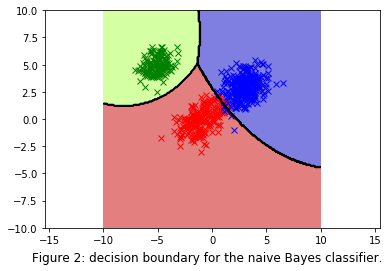

In [7]:
model = NaiveBayes()
model.fit(X_train,Y_train)

x = np.linspace(-10, 10, 200)
y = np.linspace(-10, 10, 200)
X, Y = np.meshgrid(x, y)
z = np.zeros(X.shape)
Z = np.array(z)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i,j] = model.pred(np.array([x[j],y[i]]))
plt.contourf(X, Y, Z, alpha=.5, cmap='jet_r')
C = plt.contour(X, Y, Z,  colors='black',zorder=4)
plt.plot(x0[:,0],x0[:,1],'x',color='red',zorder=1)
plt.plot(x1[:,0],x1[:,1],'x',color='green',zorder=3)
plt.plot(x2[:,0],x2[:,1],'x',color='blue',zorder=2)
plt.axis('equal')
plt.figtext(0.5, 0.01, 'Figure 2: decision boundary for the naive Bayes classifier.', 
            wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

## Final remarks

We remark that the classifier is very flexible as we may use different distributions to model each conditional distribution. We also remark that this algorithm is very stable, as we will see in future notebooks. Finally, it is worth pointing out that even though the assumptions are easily violated, the fact that we do not need the **actual** probability in order to perform the predictions, so ignoring the second order terms coming from the covariance of the variables might not have a very big impact in the final predictions.